# Using Python to Numerically Solve First-Order IVPs
> 14 January 2020: Initial version created by K. Oliveras

> 06 January 2022: Updated for clarity

This Python Notebook demonstrates how to numerically solve the initial value problem $$y' = y\left(1 - y\right), \qquad y(0) = 0.5$$ using an explicit Runge-Kutta method of order 5(4) (Dormand,Prince).



## Preliminaries/Necessary Libraries
The following block of code loads the appropriate libraries needed to 
 1. use *Matlab-like* arrays `numpy`
 2. use `scipy`'s Runge-Kutta solver
 3. use `matplotlib` to create plots

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

## Setting up and Solving the ODE
For all of our numerical methods to solve a differential equation of the form $y' = f(t,y)$ with $y(t_0) = y_0$, there are several ingredients that we need to provide

1. The initial conditions $t_0$ and $y_0$ 
2. The final time when we would like to compute the solution $t_f$ 
3. The number of steps we would like to take \(N\) thus defining $\Delta t$ 
4. The $f(t,y)$ corresponding to the differential equation we would like to solve.  For this step, we will need write the differential equation in the general form $$y' = f(t,y)$$ and define the function `f(t,y)`.  It is worth noting that the differential equation is already in this standard form where $$f(t,y) = y (1-y).$$  

The following block of code declares the parameters and defines the function `ODEFun` that takes the input `t` (our independent variable) and `y` (our dependent variable).

In [40]:
tSpan = [0,10]  # tSpan = [t_0 , t_f]
iniCond = [0.5] # iniCond = [y_0]
t = np.linspace(0,10,100); # store equally spaced t values for evaluation later on.

def ODEFun(t,y):  # defining the function f(t,y)
    return y*(1-y)

Now that we have defined the variables, we can use `SciPy`'s `solve_ivp` command to numerically solve the ODE.  The documentation can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html




In [41]:
sol = solve_ivp(ODEFun, tSpan, iniCond, t_eval = t);
print("The solution evaluated at the specified t-values is:")
print(sol.y)

The solution evaluated at the specified t-values is:
[[0.5        0.52523108 0.55033653 0.57518975 0.59966531 0.62364941
  0.64703997 0.66974664 0.69169077 0.71280546 0.73303552 0.75233748
  0.77067959 0.78804262 0.80442706 0.81984305 0.83430473 0.8478305
  0.86044308 0.87216944 0.88304087 0.89309291 0.9023654  0.91090246
  0.9187525  0.9259682  0.9326148  0.93875941 0.94442119 0.94961778
  0.9543685  0.95869434 0.96261793 0.9661636  0.96935733 0.97222676
  0.97480122 0.97711169 0.97919082 0.98107293 0.982794   0.98439169
  0.98588043 0.98724721 0.9884956  0.98962983 0.99065482 0.99157612
  0.99239994 0.99313317 0.99378332 0.99435858 0.99486778 0.99532042
  0.99572665 0.99609727 0.99644375 0.99677761 0.99709532 0.99739165
  0.99766537 0.99791566 0.99814203 0.9983444  0.99852304 0.99867861
  0.99881215 0.99892506 0.99901912 0.99909649 0.9991597  0.99921166
  0.99925565 0.99929532 0.99933471 0.99937822 0.99943061 0.99948787
  0.99954348 0.99959662 0.99964655 0.99969269 0.99973453 0.99977

## Plotting the solution

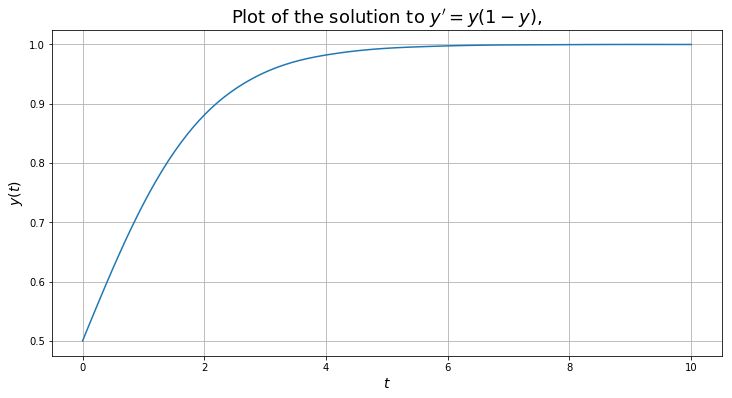

In [42]:
plt.figure(figsize=(12,6));
plt.plot(sol.t,sol.y[0,:]);
    
plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$y(t)$',fontsize=14);
plt.title(r'Plot of the solution to $y^\prime = y(1-y), ~~y(0) = 0.5$',fontsize=18);
plt.grid();
plt.show()

## Plotting solutions with multiple initial conditions

Now, let's see how the solutions changes as we vary the initial conditions.  Let's create a vector of initial conditions so that $$y(0) = 0, 0.1, 0.2, \ldots 1.2$$  The command `np.linspace(a,b,n)` creates $n$ equally spaced points starting at $a$ and ending at $b$.  The following command will generate the list of initial values we are interested in exploring.

In [43]:
iniVals = np.linspace(0,1.2,13)
print(a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]


Now, we will simply loop over these initial conditions and plot the solution as before

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  max(1, SAFETY * error_norm ** (-1 / (order + 1))))


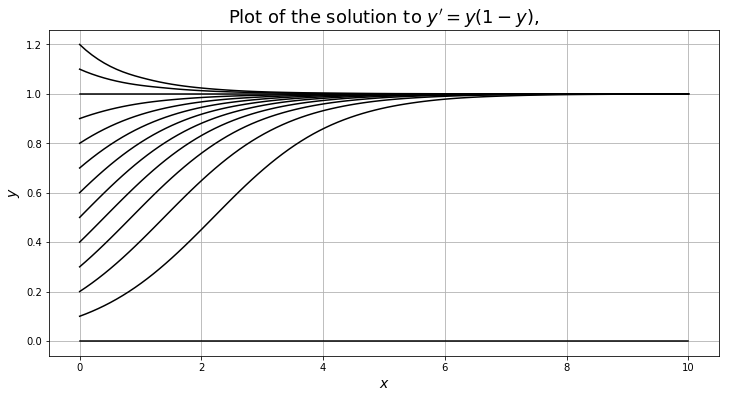

In [44]:
plt.figure(figsize=(12,6));

for j in range(0,np.size(a)):
    sol = solve_ivp(ODEFun, tSpan, [iniVals[j]], t_eval = t);
    plt.plot(sol.t,sol.y[0,:],color='black');
    
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14);
plt.title('Plot of the solution to $y^\prime = y(1-y), ~~y(0) = 0.5$',fontsize=18);
plt.grid();
plt.show()